Load the dataset

In [5]:
import pandas as pd

# Load the synthetic dataset without header
data = pd.read_csv('A3-data', header=None, names=['x', 'y', 'z', 't', 'class'], skiprows=1)

# Display the first few rows of the dataset
print(data.head())

# Extract features
X = data.iloc[:, :-1]

          x         y         z         t  class
0 -0.031676 -9.912054 -0.579436 -1.044239      1
1  0.002526  6.172456  3.288339 -1.006427      5
2  0.183123 -0.387841  6.236470 -1.691491      2
3 -0.042262 -1.996272 -1.655302 -2.995311      1
4 -0.062811 -0.417072  6.657475 -3.633134      4


# PCA

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


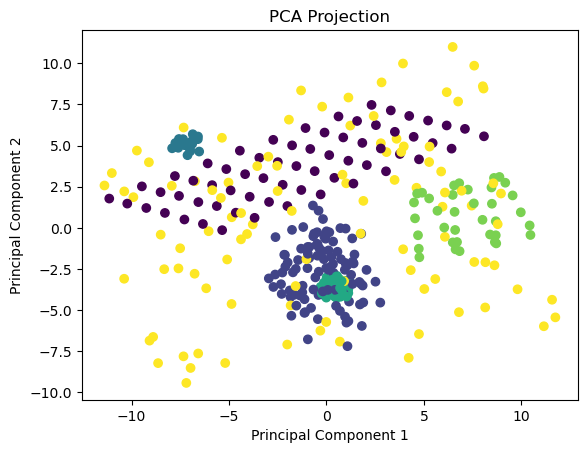

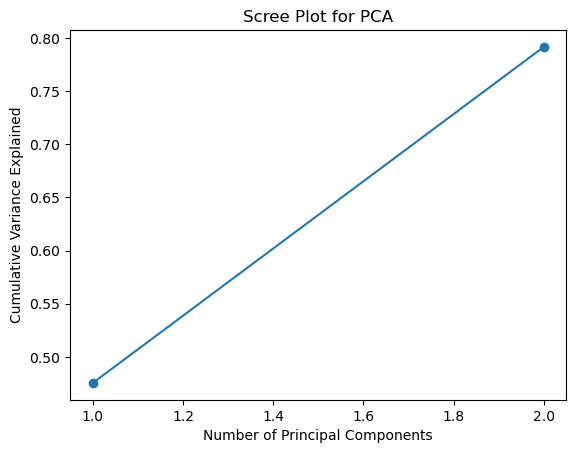

In [6]:
# Apply PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Plot PCA Projection
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['class'], cmap='viridis')
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot Scree Plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Scree Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

# t-SNE

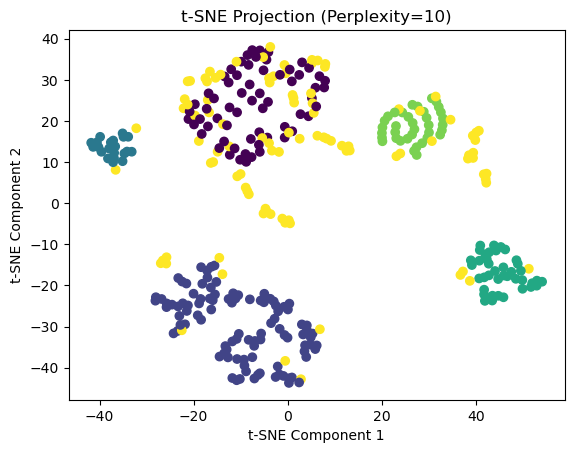

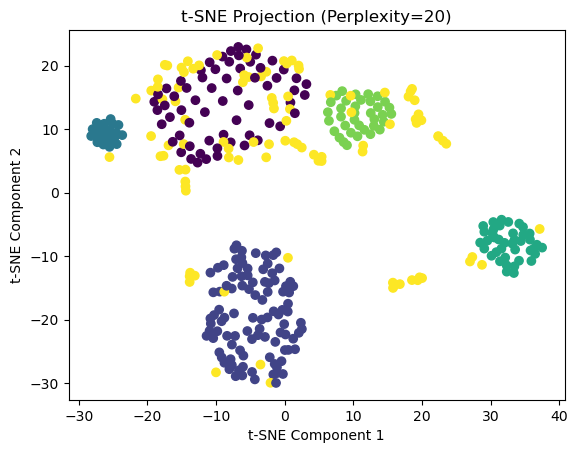

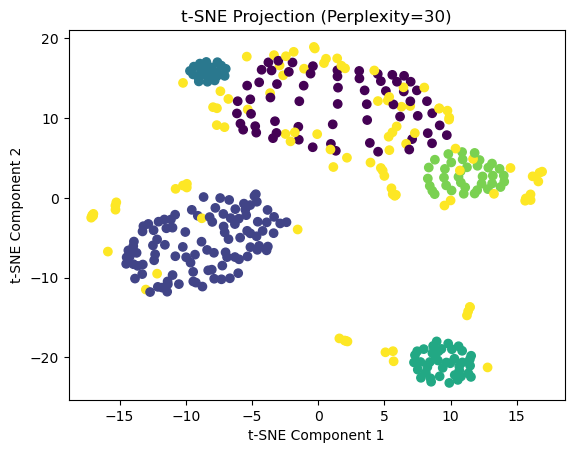

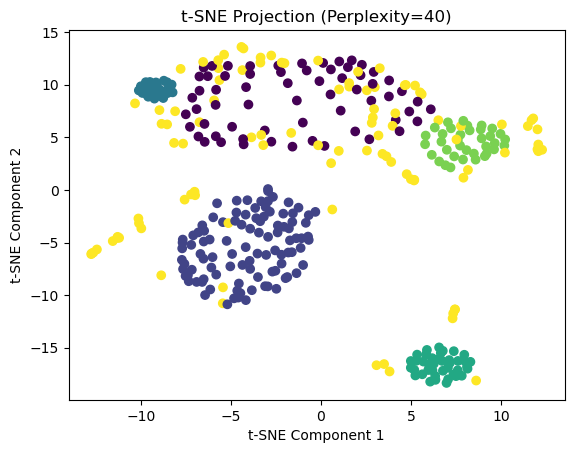

In [7]:
# Apply t-SNE with different perplexity values
from sklearn.manifold import TSNE

# Define perplexity values to try
perplexities = [10, 20, 30, 40]

# Plot t-SNE Projection for each perplexity
for perplexity in perplexities:
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_result = tsne.fit_transform(X)

    # Plot t-SNE Projection
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['class'], cmap='viridis')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# k-means

la confusion matrix no surt be. sha d mirar

/home/joan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


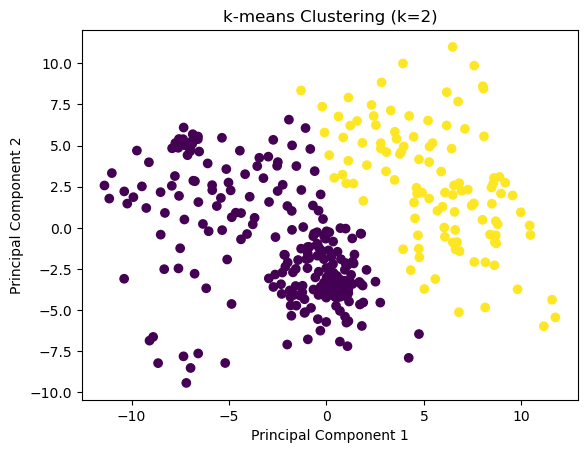

/home/joan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


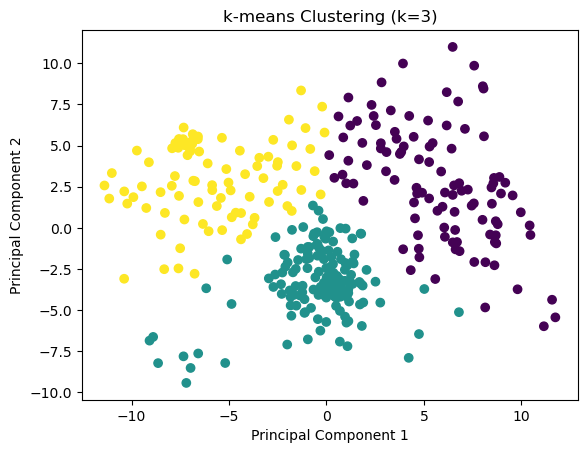

/home/joan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


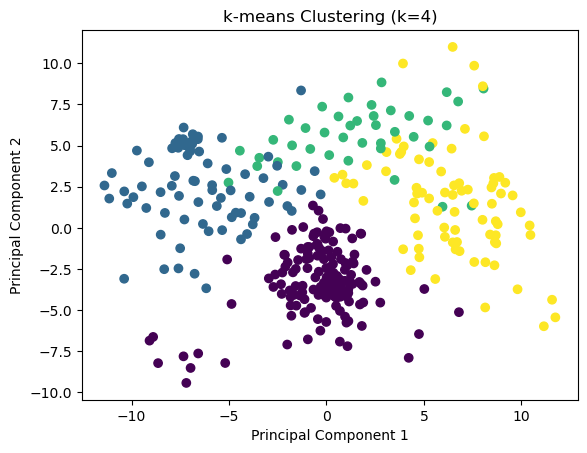

/home/joan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


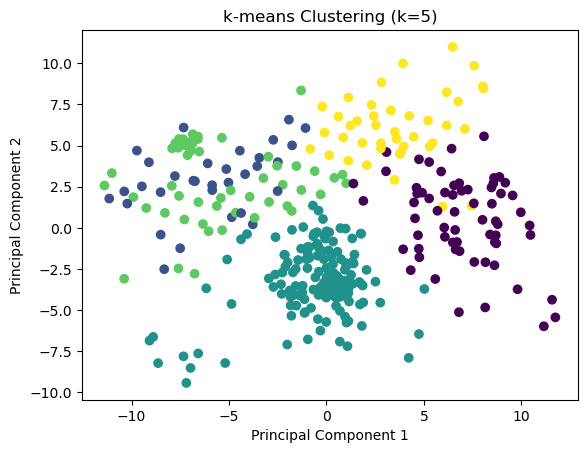

/home/joan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


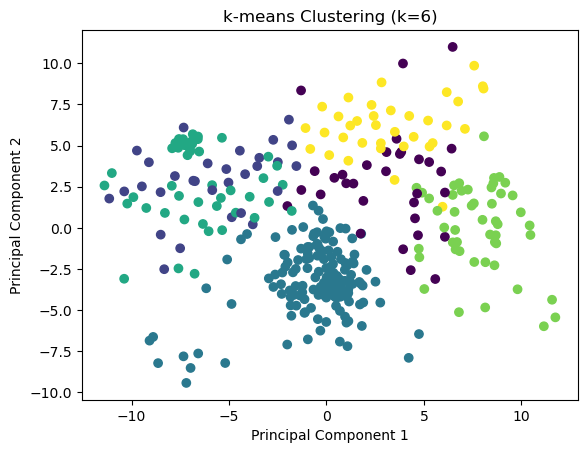

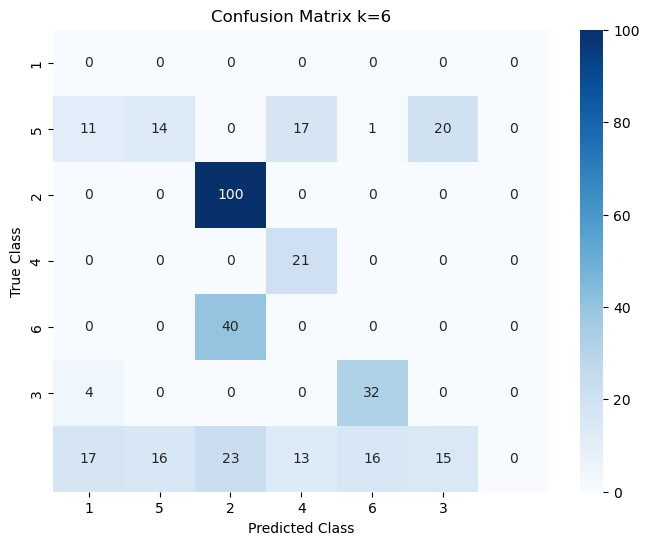

[[  0   0   0   0   0   0   0]
 [ 11  14   0  17   1  20   0]
 [  0   0 100   0   0   0   0]
 [  0   0   0  21   0   0   0]
 [  0   0  40   0   0   0   0]
 [  4   0   0   0  32   0   0]
 [ 17  16  23  13  16  15   0]]
class
2    100
6    100
1     63
4     40
5     36
3     21
Name: count, dtype: int64
[1 4 2 1 2 0 4 0 4 5 2 3 3 2 2 2 2 2 3 2 5 1 2 2 3 4 0 3 2 1 3 5 4 2 4 2 2
 2 2 0 2 1 2 2 2 2 2 4 4 2 0 2 2 0 4 4 2 3 3 5 4 5 5 1 2 3 2 5 2 2 2 1 0 1
 2 1 2 4 1 2 2 2 4 0 4 4 0 2 2 4 3 5 4 3 2 0 4 2 2 2 0 2 0 5 2 3 5 1 2 4 2
 2 4 5 2 3 2 4 2 5 2 4 2 2 0 4 2 2 5 5 4 0 5 2 5 2 2 2 2 4 2 2 5 0 2 5 4 4
 3 0 2 5 5 3 0 3 0 3 4 3 3 0 3 3 1 3 4 2 3 5 2 3 5 2 2 2 1 2 4 2 2 2 0 2 3
 2 1 2 0 2 5 5 2 4 5 5 2 2 2 2 5 5 2 2 4 4 5 1 3 0 2 1 2 2 2 2 2 1 3 2 2 2
 2 2 5 2 3 3 0 2 2 2 2 0 5 0 3 2 2 2 1 2 4 3 0 2 2 2 2 2 2 2 2 2 2 5 2 3 3
 1 3 2 2 2 3 3 1 2 2 2 3 2 3 2 2 2 3 2 4 2 2 4 4 2 4 3 0 3 0 3 2 4 0 1 2 4
 3 1 2 1 0 4 2 3 1 2 2 1 2 4 3 1 3 2 2 2 0 2 2 3 5 2 5 2 2 2 2 4 2 4 4 4 2
 2 2 2 2 2 1 3 2 4 2 

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define values of k to try
k_values = [2, 3, 4, 5, 6]

# Plot k-means Clustering for each value of k
for k in k_values:
    # Apply k-means
    kmeans = KMeans(n_clusters=k)
    kmeans_result = kmeans.fit_predict(X)

    # Plot k-means Clusters
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_result, cmap='viridis')
    plt.title(f'k-means Clustering (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    # Plot confusion matrix for k = 6
    if k == 6:
        confusion_mat = confusion_matrix(data['class'], kmeans_result)
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=data['class'].unique(), yticklabels=data['class'].unique())
        plt.title(f'Confusion Matrix k=6')
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.show()

        print(confusion_mat)
        print(data['class'].value_counts())
        print(kmeans_result)

# AHC

/home/joan/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


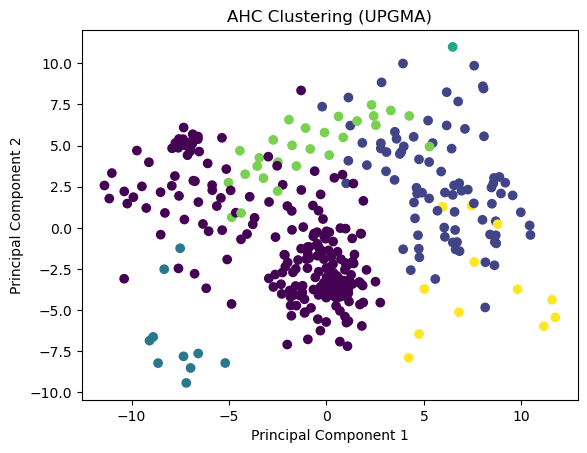

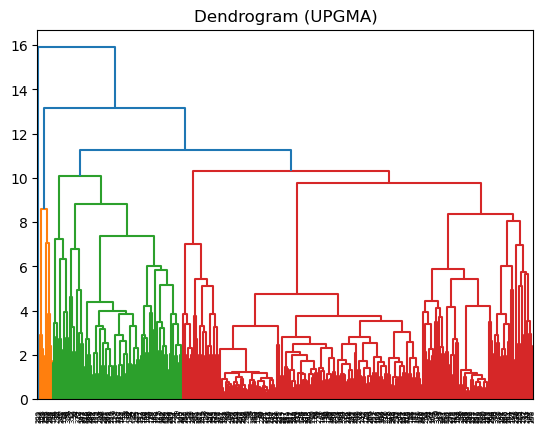

/home/joan/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


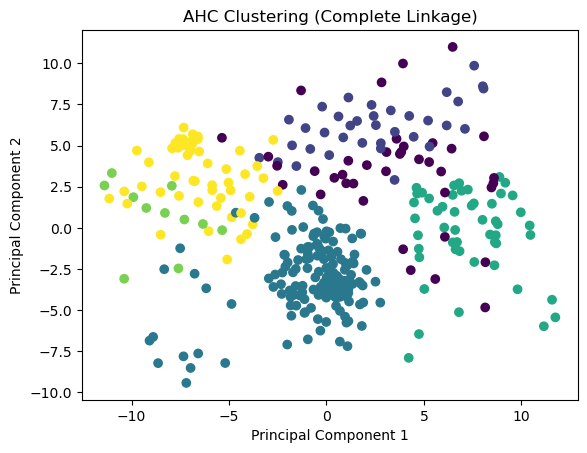

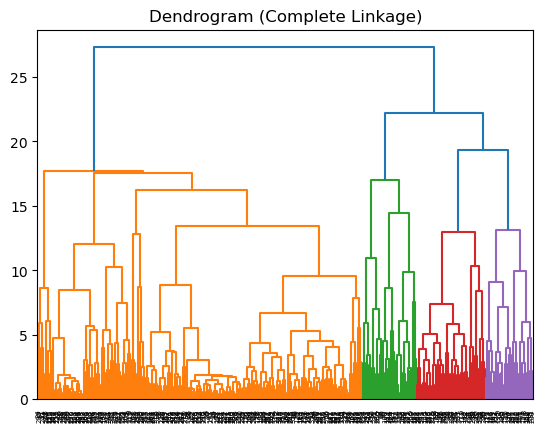

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Calculate Euclidean distances
from scipy.spatial.distance import pdist, squareform

# Calculate Euclidean distances
distances = pdist(X, metric='euclidean')

# Apply AHC with UPGMA method
ahc_upgma = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='euclidean')
ahc_upgma_result = ahc_upgma.fit_predict(X)

# Plot AHC Clusters (UPGMA)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ahc_upgma_result, cmap='viridis')
plt.title('AHC Clustering (UPGMA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot Dendrogram (UPGMA)
linkage_matrix_upgma = linkage(distances, method='average')
dendrogram(linkage_matrix_upgma)
plt.title('Dendrogram (UPGMA)')
plt.show()

# Apply AHC with Complete Linkage method
ahc_complete = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='euclidean')
ahc_complete_result = ahc_complete.fit_predict(X)

# Plot AHC Clusters (Complete Linkage)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ahc_complete_result, cmap='viridis')
plt.title('AHC Clustering (Complete Linkage)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot Dendrogram (Complete Linkage)
linkage_matrix_complete = linkage(distances, method='complete')
dendrogram(linkage_matrix_complete)
plt.title('Dendrogram (Complete Linkage)')
plt.show()

# SOM